# Assignment 10

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import *
from IPython.display import clear_output
import pandas as pd
import random as rd
import scipy

newparams = {'figure.figsize': (15, 9), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)

## Part 1: Random Number Generator

In [15]:
def tilfeldigtall(antall):
    tall = np.empty(0)
    forsøk = np.linspace(0, antall)
    
    for i in range(len(forsøk)):
        tall1 = rd.random() 
        tall = np.append(tall, tall1)
        
    return forsøk, tall

def tilfeldigplot(antall):
    forsøk, tall = tilfeldigtall(antall)
    
    plt.scatter(forsøk, tall, label = "Tilfeldige punkt")
    plt.axhline(y = 0.5, linestyle = "--", label = "0.5")
    plt.xlabel("Forsøk")
    plt.ylabel("Verdi")
    plt.title("Resultat")
    plt.legend()
    plt.grid() 
    plt.show()
    
    #Histogram
    colors = ['red', 'peachpuff', 'orange', 'chartreuse', 'limegreen', 'turquoise', 'cyan', 'blue', 'hotpink', 'crimson']
    
    plt.hist(tall, bins=[0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color = "hotpink", ec = "white")
    
    plt.ylabel("Frekvens")
    plt.xlabel("Verdi")
    plt.title("Histogram")
    plt.show()

antall_slider = widgets.IntSlider(value = 7500, min = 5000, max = 10000, step = 500)

interact(tilfeldigplot, antall = antall_slider, description = "Choose number of trials")

interactive(children=(IntSlider(value=7500, description='antall', max=10000, min=5000, step=500), Output()), _…

<function __main__.tilfeldigplot(antall)>

## Part 2: Buffon's Needle approach

In [24]:
L = 1
K = 1

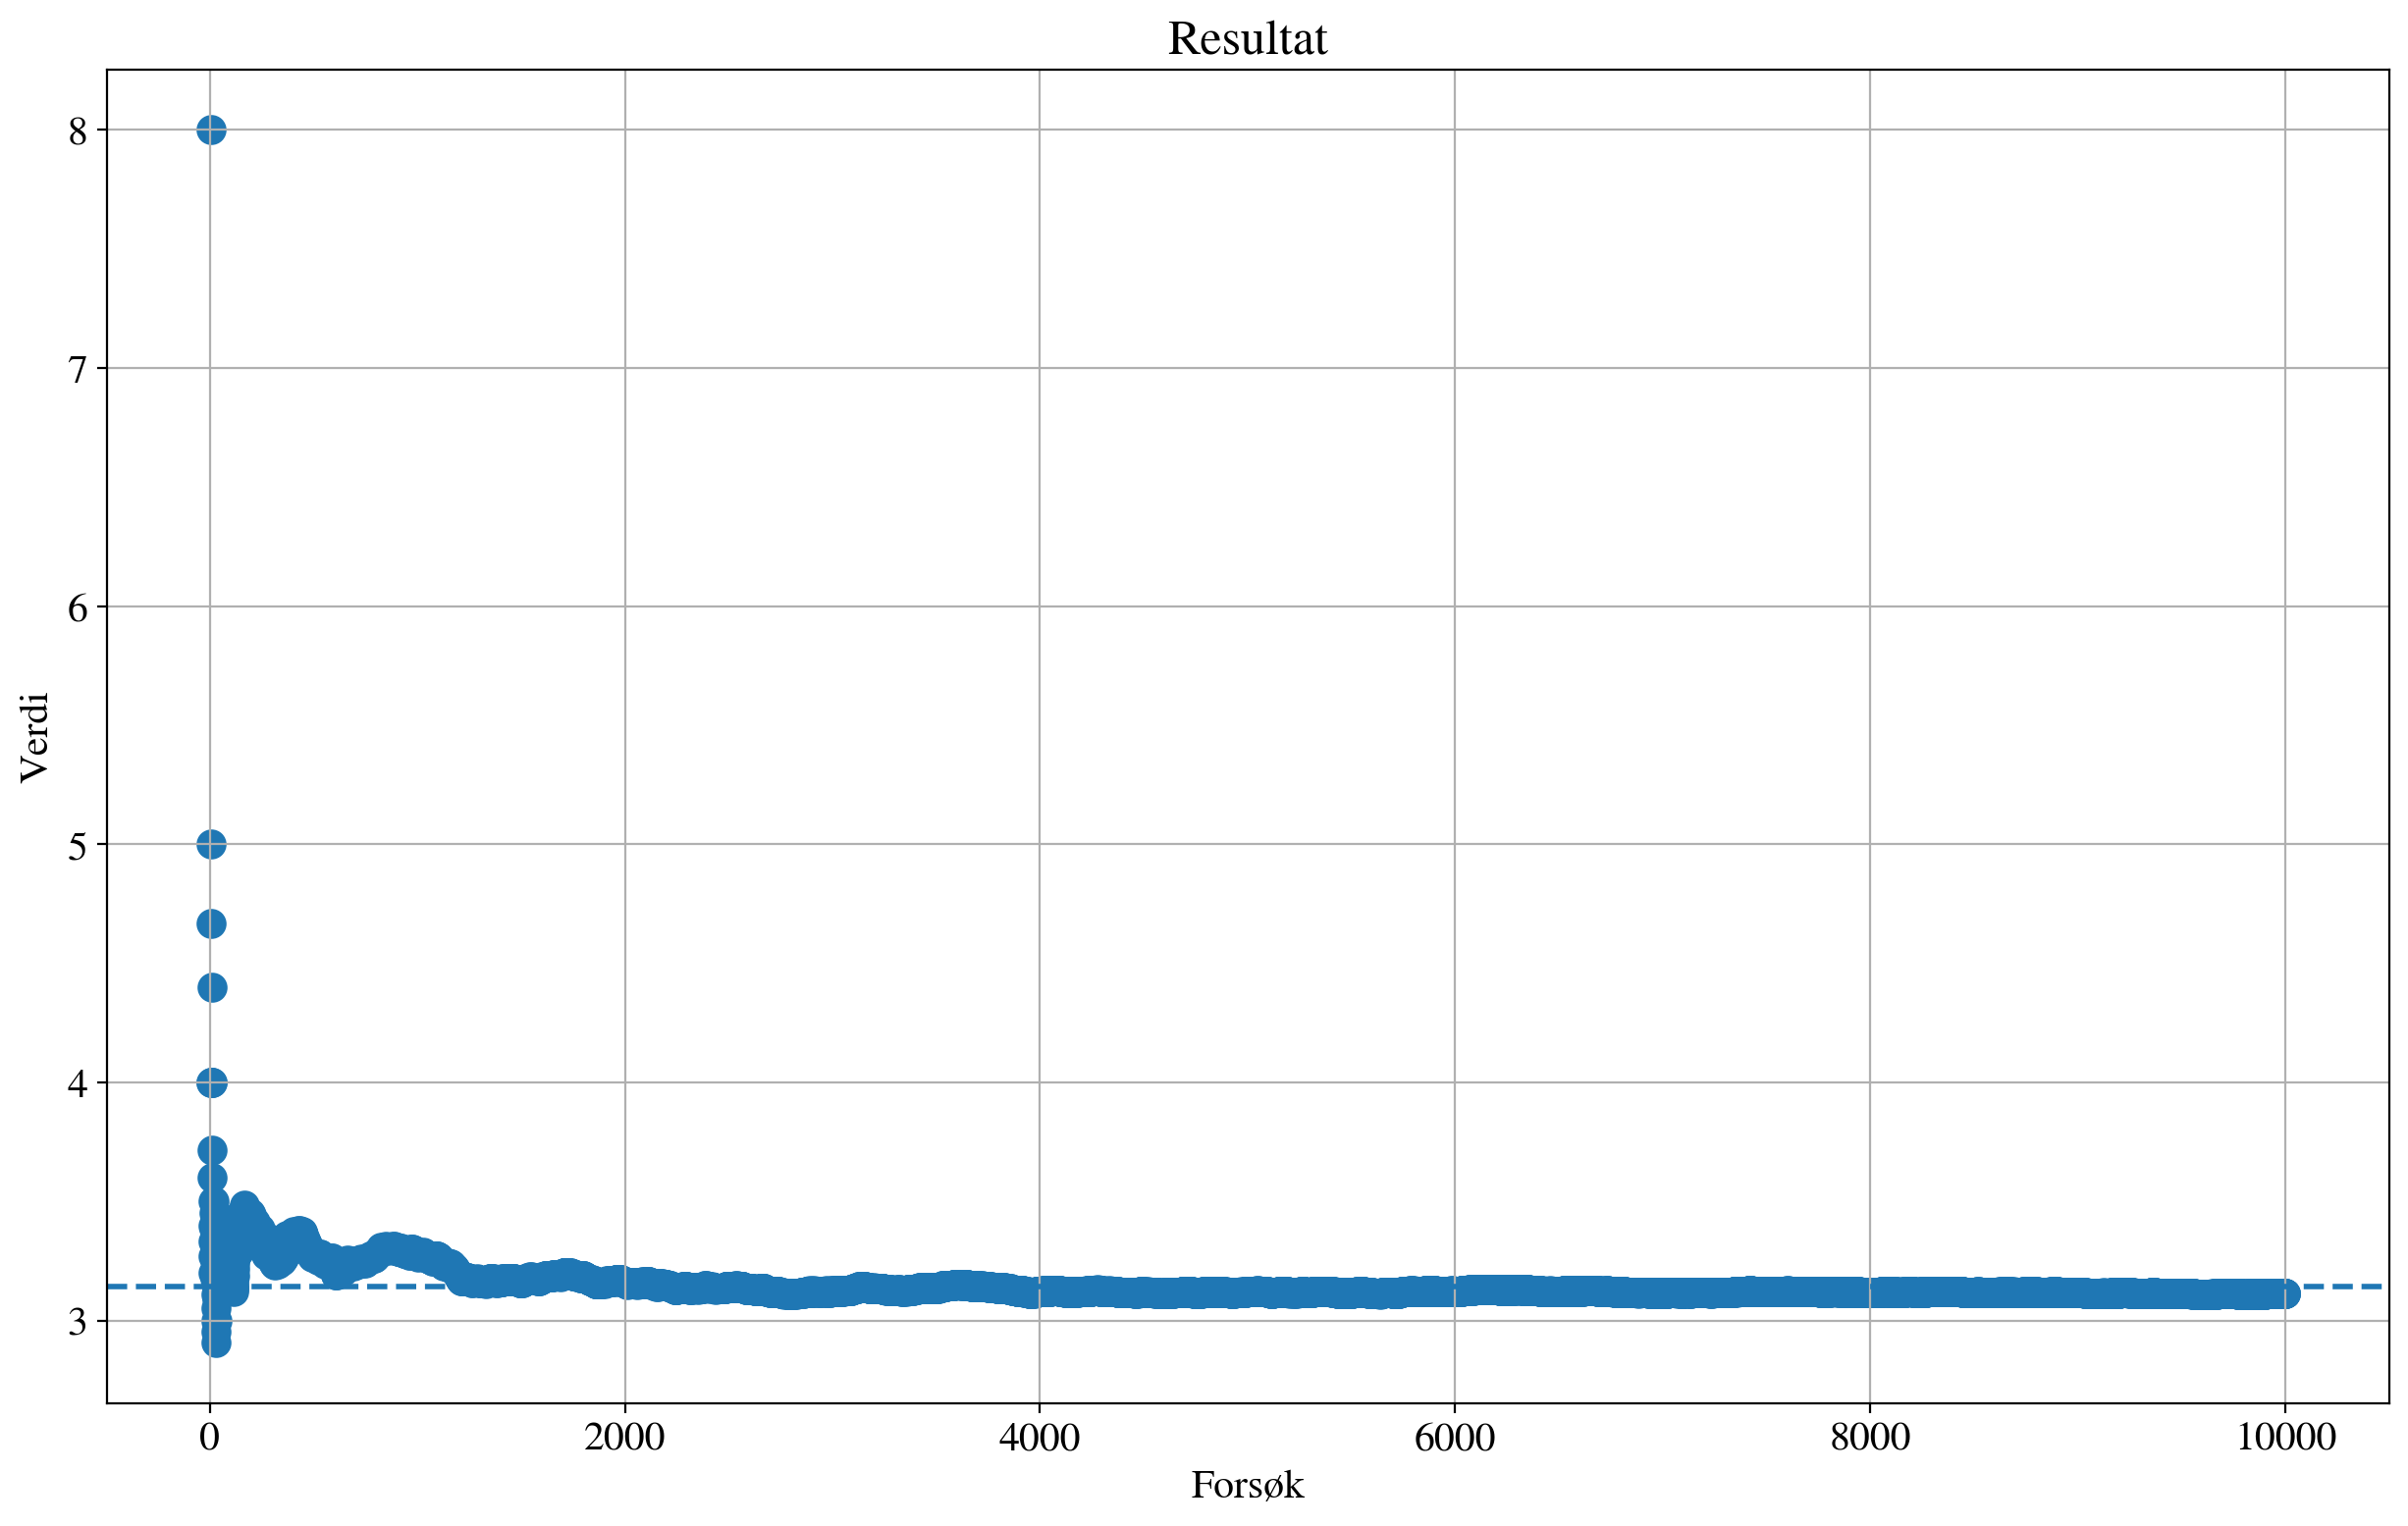

In [14]:
def finnpi(forsøk):
    
    Ns = 0
    N = np.arange(1, forsøk+1)
    piliste = np.zeros(10000)
    for i in range(len(N)):
        d = rd.random()/2
        tetha = rd.uniform(0, np.pi)
        if d < 1/2*np.sin(tetha):
            Ns +=1
        pi = 2*N[i]/Ns
        piliste[i] = pi
        
    plt.scatter(N, piliste)
    plt.axhline(y = np.pi, linestyle = "--", label = "Pi")
    plt.xlabel("Forsøk")
    plt.ylabel("Verdi")
    plt.title("Development of Buffon's Needle approach")
    plt.grid()
    plt.show()
#fremstille nålen grafisk

## Part 3: Monte-Carlo Method

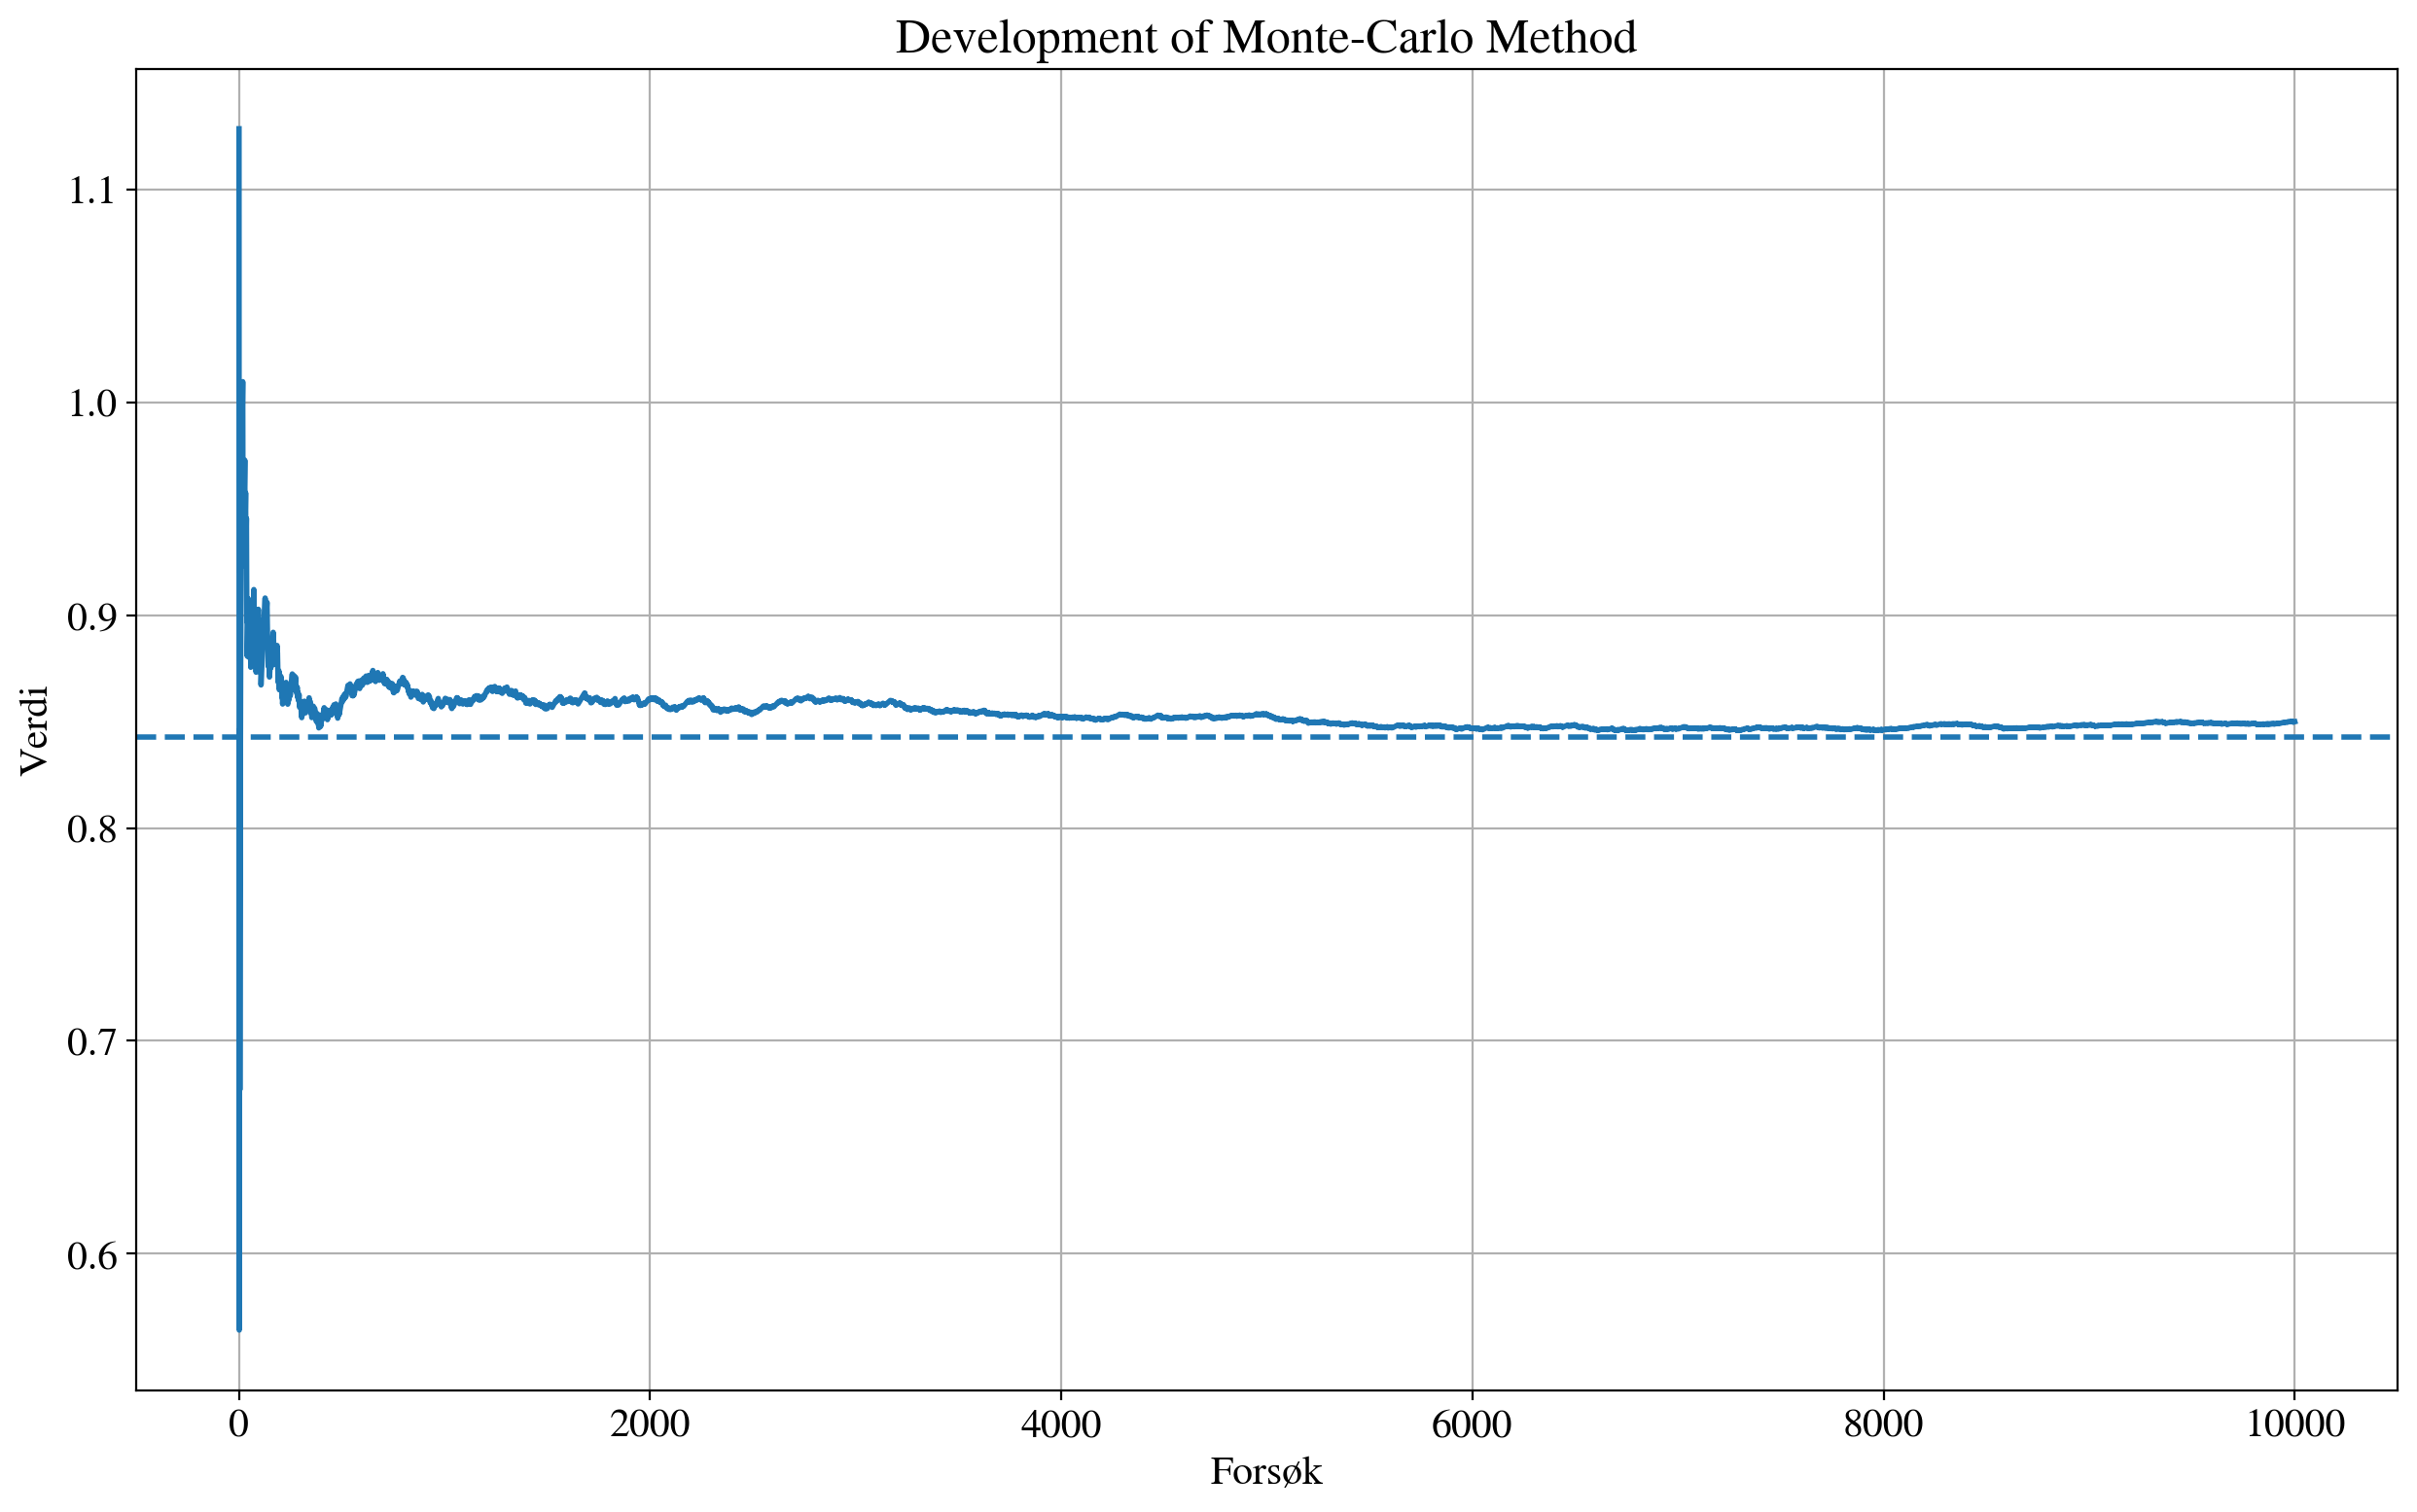

In [23]:
def monte_carlo(forsøk):
    gul = 0
    grå = 0
    N = np.arange(1, forsøk+1) #for å plotte hvordan metoden utvikler seg
    integral = np.zeros(len(N))
    for i in range(len(N)):
        x = rd.random()
        y = rd.uniform(0, 2/(np.sqrt(np.pi)))
        yfunk = 2/(np.sqrt(np.pi))*np.exp(-x**2)
        
        if y<yfunk:
            gul += 1 
        else:
            grå +=1
            
        integral[i] = gul/(gul+grå)*2/(np.sqrt(np.pi))
    
    plt.plot(N, integral)
    plt.axhline(y = scipy.special.erf(1), linestyle = "--", label = "erf(1)")
    plt.xlabel("Forsøk")
    plt.ylabel("Verdi")
    plt.title("Development of Monte-Carlo Method")
    plt.grid()
    plt.show()
    
monte_carlo(10000)
        

## Menu

In [ ]:
#lage meny som velger mellom de tre metodene